In [50]:
# python notebook for Make Your Own Neural Network
# code for a 3-layer neural network, and code for learning the MNIST dataset
# (c) Tariq Rashid, 2016
# license is GPLv2

In [51]:
import numpy
# scipy.special for the sigmoid function expit()
import scipy.special
# library for plotting arrays
import matplotlib.pyplot
# ensure the plots are inside this notebook, not an external window
%matplotlib inline

In [52]:
# neural network class definition
class neuralNetwork:
    
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass

    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [53]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 1000
output_nodes = 10

# learning rate
learning_rate = 0.8

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

In [54]:
# load the mnist training data CSV file into a list
training_data_file = open("/content/sample_data/mnist_train_small.csv",'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

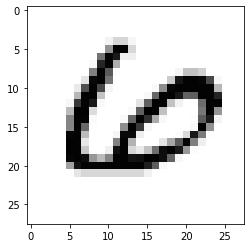

In [55]:
# OPTIONAL CELL to visualize a character from the dataset
all_values = training_data_list[0].split(',')
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [57]:
# train the neural network

# epochs is the number of times the training data set is used for training
epochs = 10

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        # optional line to show targets
        print(targets)
        pass
    pass

Streaming output truncated to the last 5000 lines.
[0.01 0.01 0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01]
[0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
[0.01 0.01 0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
[0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01 0.01 0.01]
[0.01 0.01 0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01]
[0.01 0.01 0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.99 0.01]
[0.01 0.01 0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
[0.01 0.01 0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
[0.01 0.01 0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01]
[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.99 0.01]
[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.99]
[0.01 0.01 0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.99]
[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.99 0.01 0.01]
[0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
[0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01 0.01 0.01]
[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.99 0.01]
[0.01 0.01 0.

In [58]:
# load the mnist test data CSV file into a list
test_data_file = open("/content/sample_data/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [59]:
# test the neural network

# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    # Optional line to print guess info
    print(outputs)
    print("The digit is a", correct_label, "and the system guessed", label)
    # append correct or incorrect to list
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    
    pass

Streaming output truncated to the last 5000 lines.
 [9.99999679e-01]
 [5.01154606e-08]
 [1.04298377e-05]
 [1.27529940e-06]
 [1.54117803e-05]]
The digit is a 5 and the system guessed 5
[[1.72457390e-04]
 [3.65976318e-04]
 [1.42508448e-03]
 [1.20387237e-04]
 [4.07175773e-04]
 [9.87631162e-03]
 [2.90785645e-04]
 [7.66331058e-01]
 [4.71909229e-05]
 [1.28048972e-02]]
The digit is a 7 and the system guessed 7
[[2.24730165e-03]
 [1.08070305e-03]
 [9.97001899e-01]
 [2.05468219e-04]
 [1.88333975e-05]
 [9.83861060e-04]
 [3.29226689e-03]
 [6.41931769e-06]
 [6.25575125e-04]
 [1.77339141e-03]]
The digit is a 2 and the system guessed 2
[[2.87313724e-05]
 [4.68652739e-05]
 [8.50555567e-05]
 [9.99877276e-01]
 [4.10288552e-06]
 [1.31997934e-04]
 [1.11323312e-06]
 [5.65430065e-06]
 [1.50070115e-06]
 [2.96075359e-05]]
The digit is a 3 and the system guessed 3
[[8.88130586e-04]
 [9.99862527e-01]
 [5.40658847e-04]
 [3.75109312e-04]
 [1.18083632e-04]
 [1.99085632e-03]
 [6.28783835e-04]
 [2.71554423e-04]
 [1

In [60]:
# calculate the performance score, the fraction of correct answers
scorecard_array = numpy.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)

performance =  0.9068
